# <div style="text-align: center; background-color:#80ced6; font-family:Impact; color: black; padding: 20px; line-height: 1;border-radius:20px">Drug_Classification 🕊️</div>

<div id='2.2' style='background-color:#80ced6;text-align:center;padding:4px;border-radius:25px'>
    <h3 style='color:black;font-family:Impact'> About Dataset</h3>
</div>


* Age: Numeric input field.
* Sex: Radio buttons for 'F' and 'M'.
* Blood Pressure (BP): Dropdown menu with options for 'HIGH', 'LOW', and 'NORMAL'.
* Cholesterol: Dropdown menu with options for 'HIGH', 'LOW', and 'NORMAL'.
* Na_to_K: Numeric input field for the Sodium-to-Potassium ratio.



<div id='2.1' style='background-color:#80ced6;text-align:center;padding:4px;border-radius:25px'>
    <h3 style='color:black;font-family:Impact'> Import Libraries </h3>
</div>
 

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('drug200.csv')

In [3]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


<div id='2.3' style='background-color:#80ced6;text-align:center;padding:4px;border-radius:25px'>
    <h3 style='color:black;font-family:Impact'> Exploratory Data Analysis </h3>
</div>


In [4]:
data.shape

(200, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,200.0,NaN,NaN,NaN,44.315,16.544315,15.0,31.0,45.0,58.0,74.0
Sex,200,2,M,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BP,200,3,HIGH,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cholesterol,200,2,HIGH,103,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Na_to_K,200.0,NaN,NaN,NaN,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247
Drug,200,5,drugY,91,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

<Axes: >

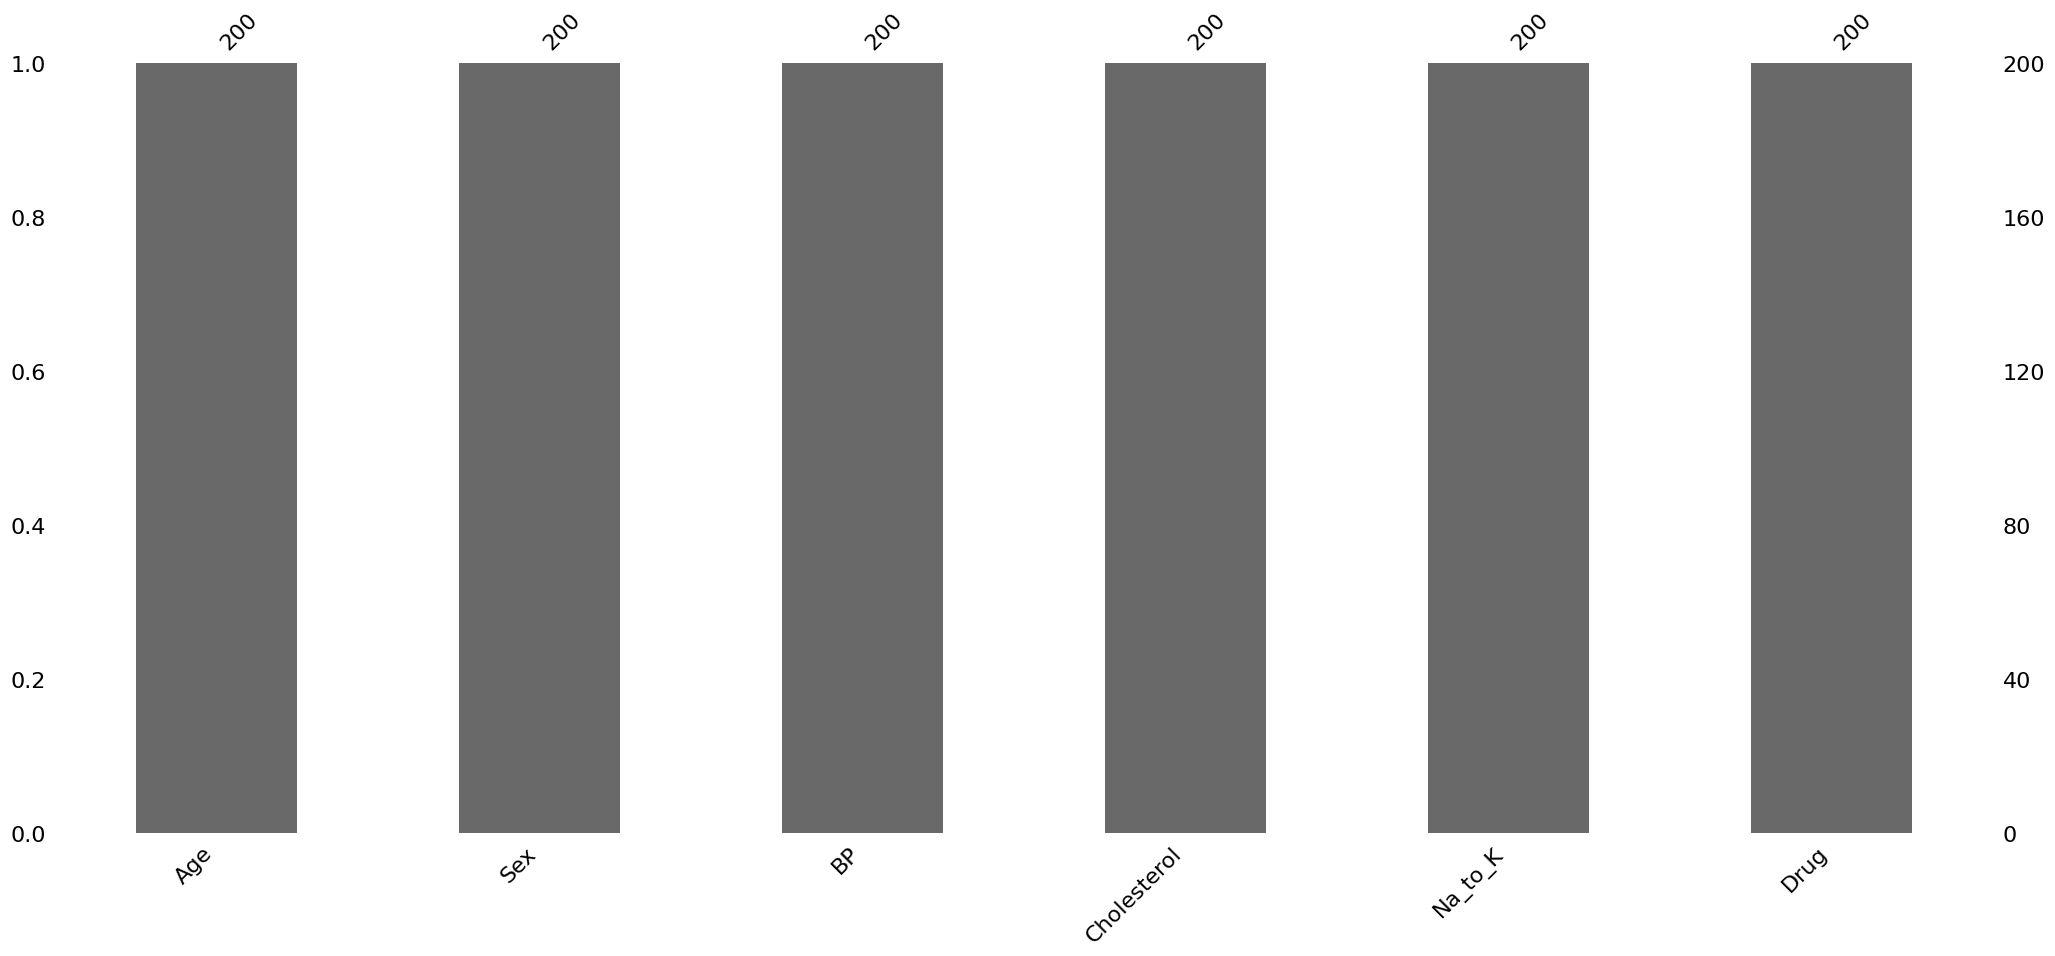

In [8]:
msno.bar(data)

In [9]:
for i in data.columns:
    print(i,':',data[i].nunique())

Age : 57
Sex : 2
BP : 3
Cholesterol : 2
Na_to_K : 198
Drug : 5


In [10]:
duplicates = data.duplicated()

In [11]:
duplicates

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [12]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


<Axes: xlabel='Sex', ylabel='count'>

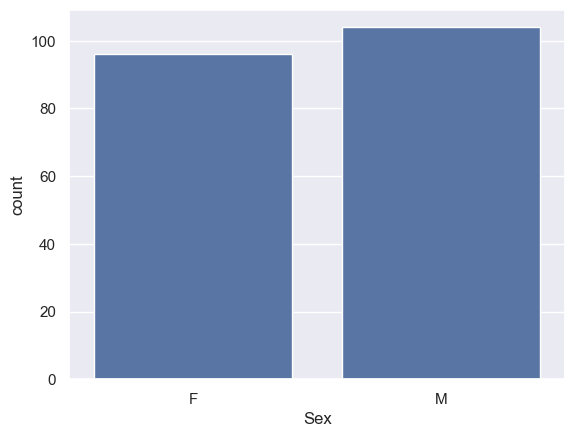

In [13]:
sns.set_theme(style="darkgrid")
sns.countplot(data=data,x='Sex')

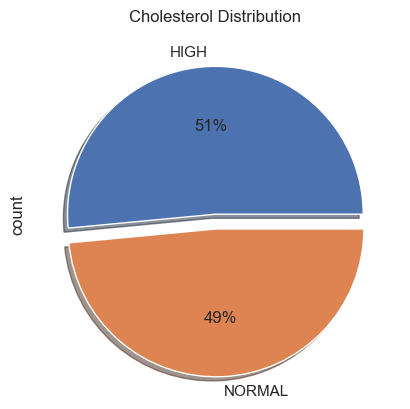

In [14]:
plt.title('Cholesterol Distribution')
data['Cholesterol'].value_counts().plot(kind='pie',explode=(0,0.1),shadow=True,autopct="%.0f%%")
plt.show()

[]

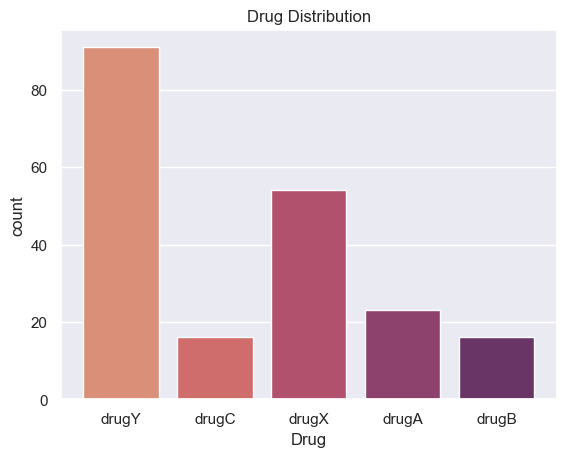

In [15]:
plt.title('Drug Distribution')
sns.countplot(data=data,x='Drug',palette="flare")
plt.plot()

* From this diagram we can say distributions of target variable  "drug" is imbalenced

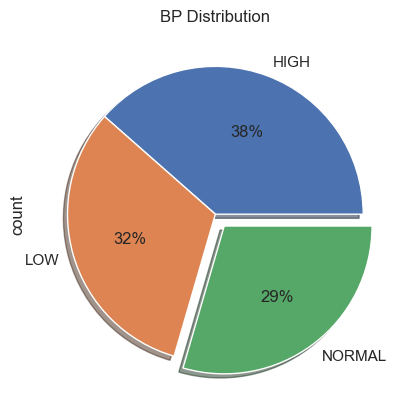

In [16]:
plt.title('BP Distribution')
data['BP'].value_counts().plot(kind='pie',explode=(0,0,0.1),shadow=True,autopct="%.0f%%")
plt.show()

<Axes: xlabel='Na_to_K', ylabel='Density'>

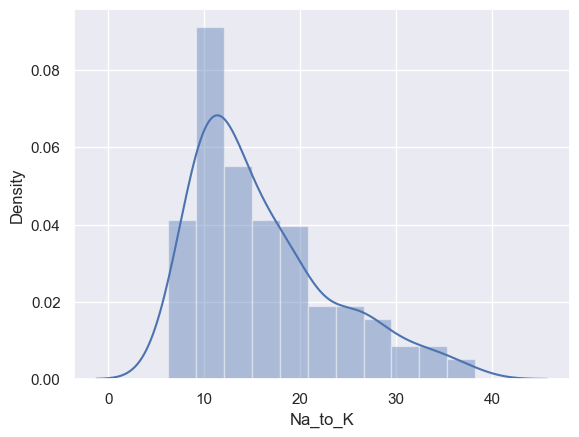

In [17]:
sns.distplot(data['Na_to_K'],hist=True)

<Axes: xlabel='Age', ylabel='Count'>

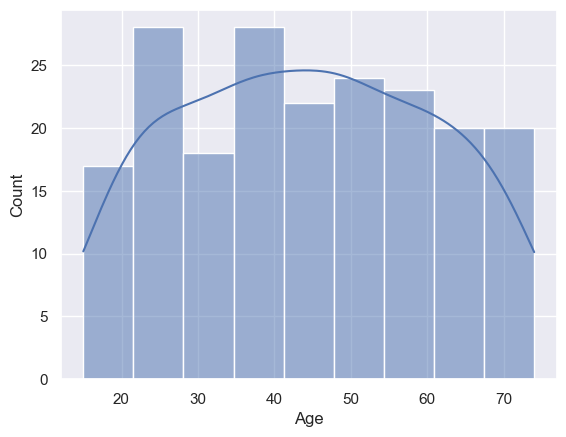

In [18]:
sns.histplot(data['Age'],kde=True)

[]

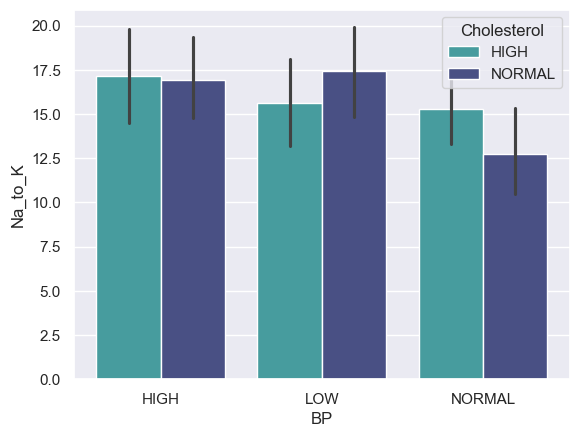

In [19]:
sns.barplot(x='BP',y='Na_to_K',data=data,hue='Cholesterol',palette="mako_r")
plt.plot()

<Axes: xlabel='Cholesterol,BP'>

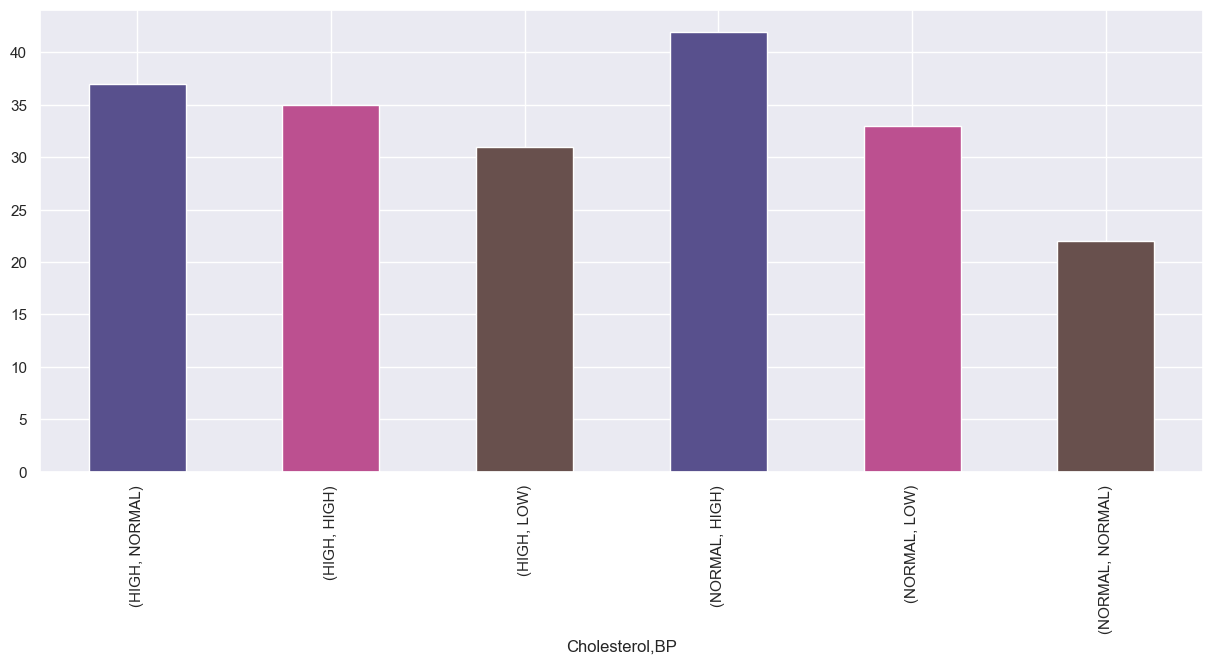

In [20]:
data.groupby(['Cholesterol'])['BP'].value_counts().plot(kind="bar",figsize=(15,6),color=['#58508d','#bc5090','#68504d'])

In [21]:
pd.crosstab(data.Sex,data.Drug)

Drug,drugA,drugB,drugC,drugX,drugY
Sex,,,,,
F,9,6,7,27,47
M,14,10,9,27,44


[]

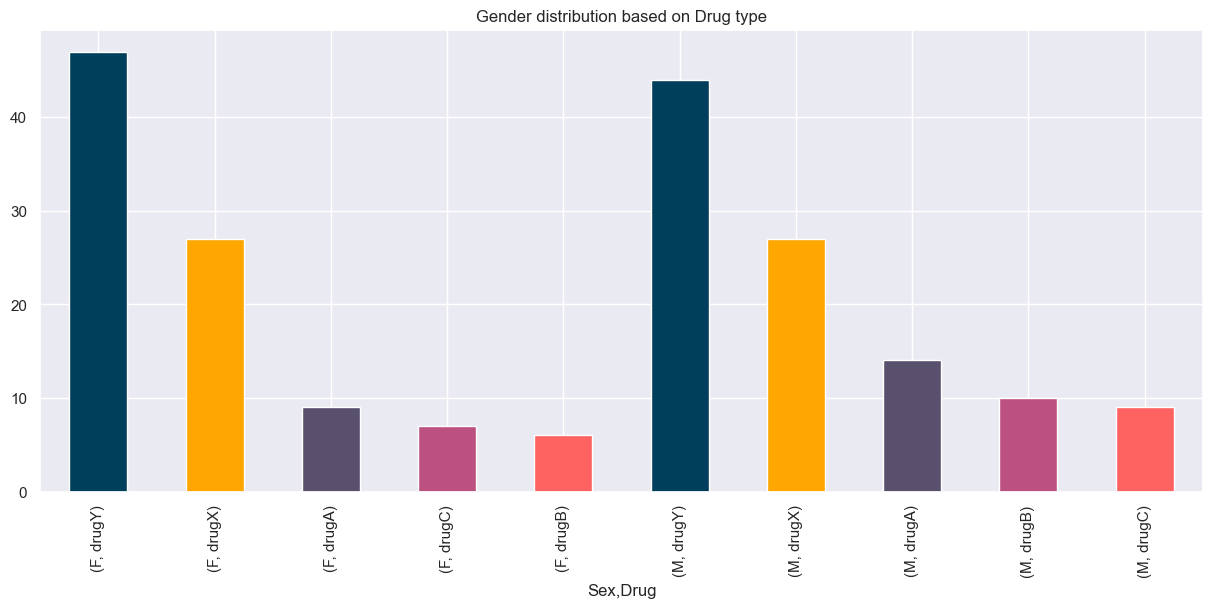

In [22]:
plt.title('Gender distribution based on Drug type')
data.groupby(['Sex'])['Drug'].value_counts().plot(kind="bar",figsize=(15,6),color=['#003f5c','#ffa600','#58506d','#bc5080','#ff6361'])
plt.plot()

[]

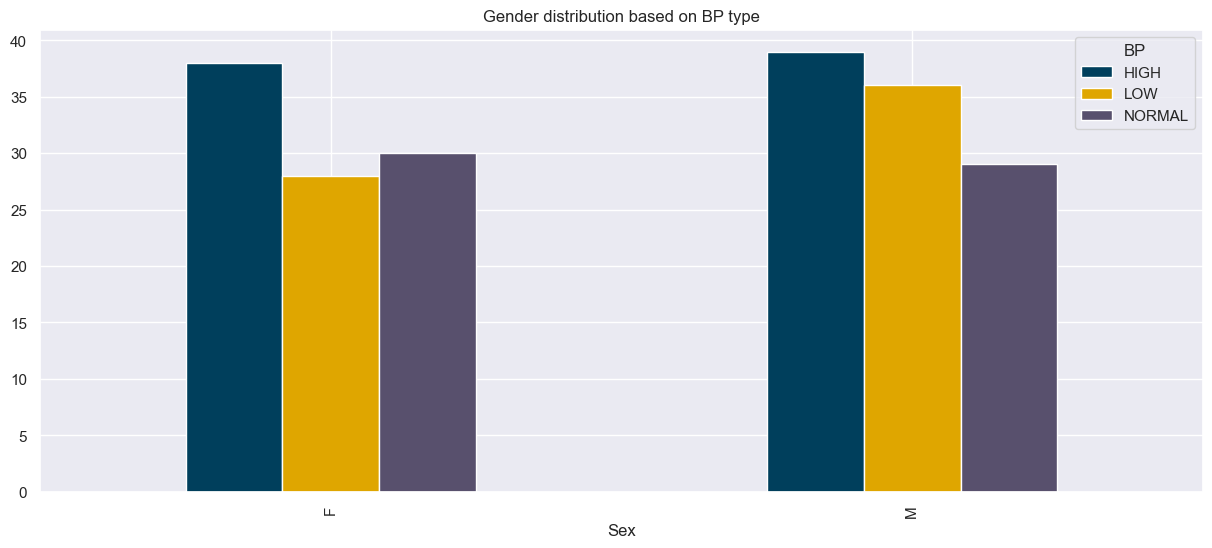

In [23]:
pd.crosstab(data.Sex,data.BP).plot(kind="bar",figsize=(15,6),color=['#003f5c','#dfa600','#58506d'])
plt.title('Gender distribution based on BP type')
plt.plot()

[]

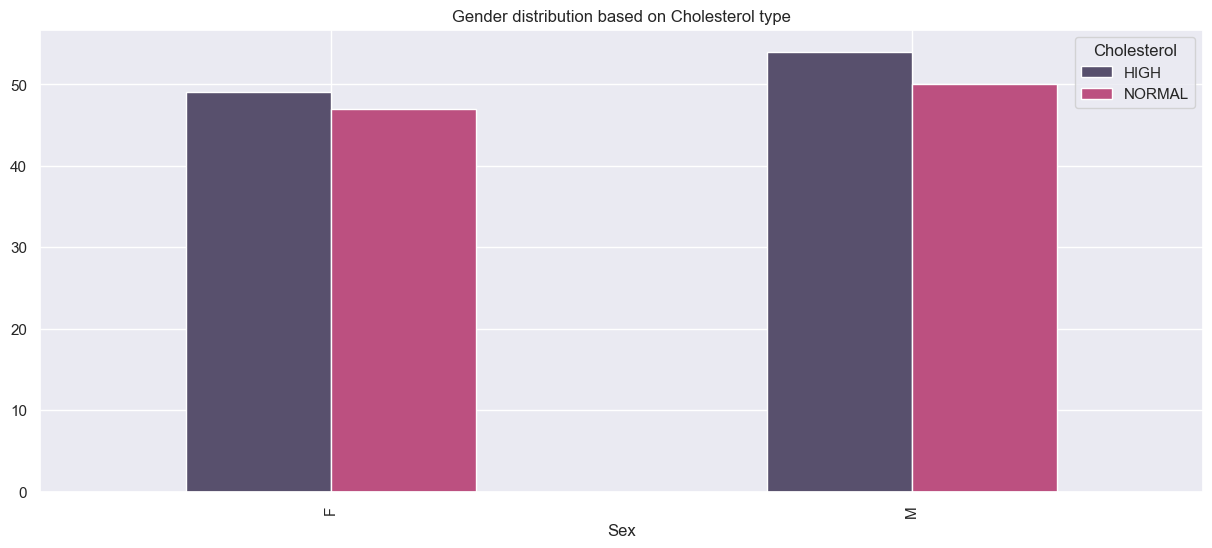

In [24]:
pd.crosstab(data.Sex,data.Cholesterol).plot(kind="bar",figsize=(15,6),color=['#58506d','#bc5080'])
plt.title('Gender distribution based on Cholesterol type')
plt.plot()

In [25]:
pd.crosstab(data.Drug,data.BP)

BP,HIGH,LOW,NORMAL
Drug,,,
drugA,23,0,0
drugB,16,0,0
drugC,0,16,0
drugX,0,18,36
drugY,38,30,23


[]

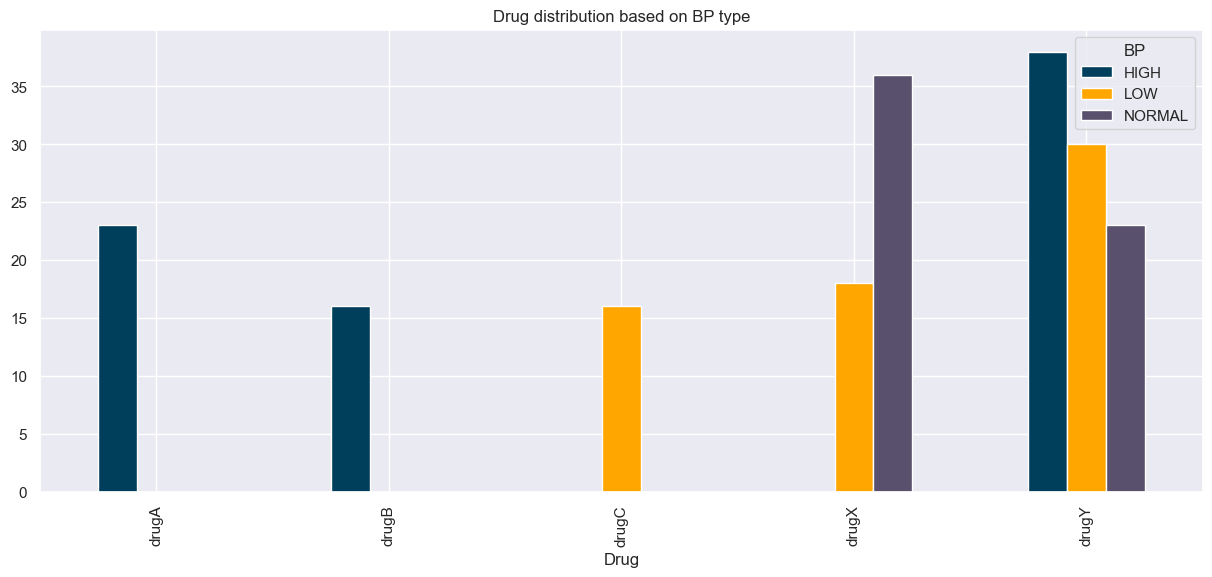

In [26]:
pd.crosstab(data.Drug,data.BP).plot(kind="bar",figsize=(15,6),color=['#003f5c','#ffa600','#58506d'])
plt.title('Drug distribution based on BP type')
plt.plot()

[]

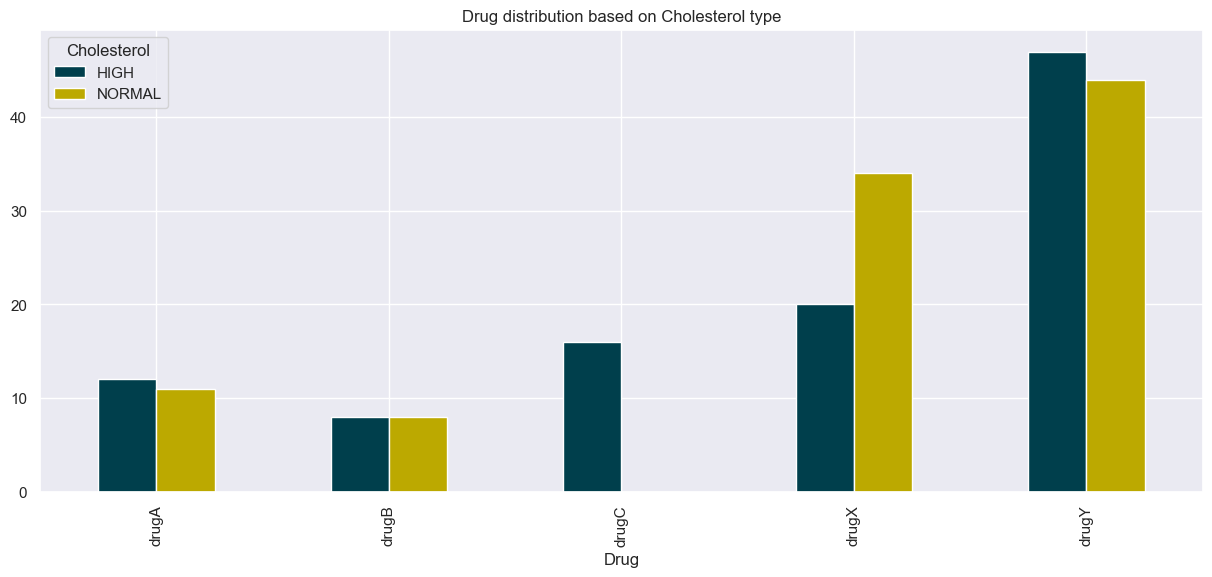

In [27]:
pd.crosstab(data.Drug,data.Cholesterol).plot(kind="bar",figsize=(15,6),color=['#003f4c','#bca900','#58509d'])
plt.title('Drug distribution based on Cholesterol type')
plt.plot()

[]

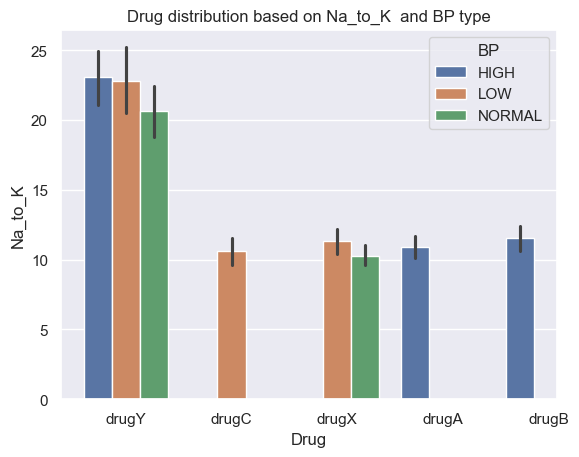

In [28]:
sns.barplot(x=data.Drug,y=data.Na_to_K,hue=data['BP'])
plt.title('Drug distribution based on Na_to_K  and BP type')
plt.plot()

[]

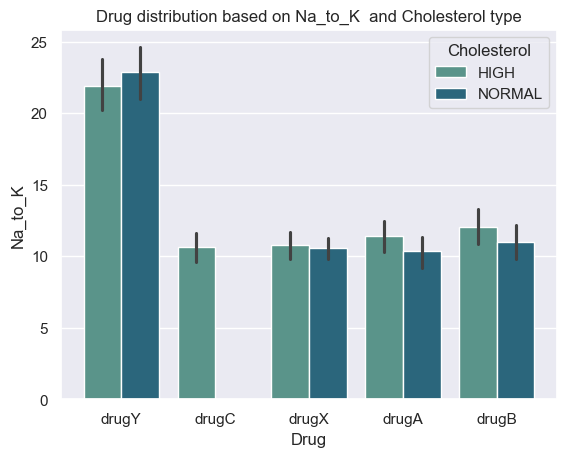

In [29]:
sns.barplot(x=data.Drug,y=data.Na_to_K,hue=data['Cholesterol'],palette="crest")
plt.title('Drug distribution based on Na_to_K  and Cholesterol type')
plt.plot()

In [30]:
data.groupby(['Drug'])['Sex'].value_counts()

Drug   Sex
drugA  M      14
       F       9
drugB  M      10
       F       6
drugC  M       9
       F       7
drugX  F      27
       M      27
drugY  F      47
       M      44
Name: count, dtype: int64

[]

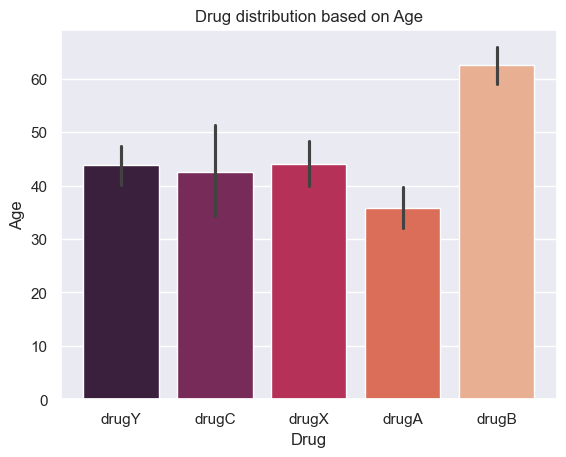

In [31]:
sns.barplot(x=data.Drug,y=data.Age,palette="rocket")
plt.title('Drug distribution based on Age')
plt.plot()

<Axes: xlabel='Drug', ylabel='Na_to_K'>

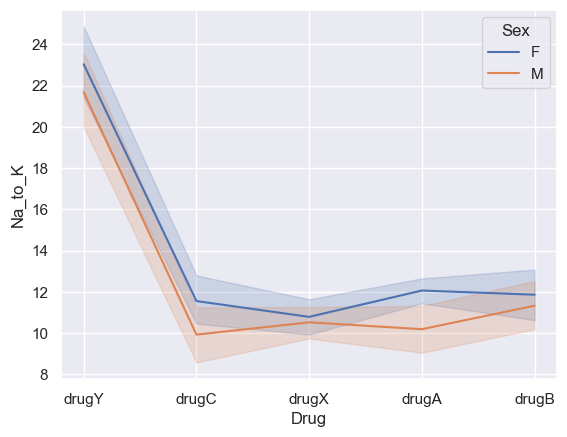

In [32]:
sns.lineplot(data=data,x='Drug',y='Na_to_K', hue='Sex')

<Axes: xlabel='Age', ylabel='Na_to_K'>

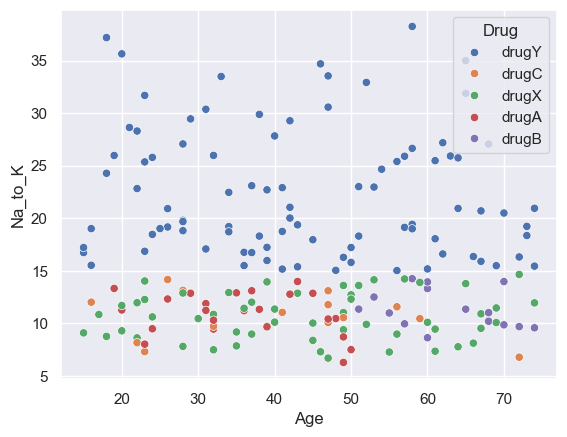

In [33]:
sns.scatterplot(data=data,x='Age',y='Na_to_K', hue='Drug')

In [35]:
data.groupby(['Drug'])[['BP','Cholesterol']].value_counts()

Drug   BP      Cholesterol
drugA  HIGH    HIGH           12
               NORMAL         11
drugB  HIGH    HIGH            8
               NORMAL          8
drugC  LOW     HIGH           16
drugX  NORMAL  HIGH           20
       LOW     NORMAL         18
       NORMAL  NORMAL         16
drugY  HIGH    NORMAL         23
       NORMAL  HIGH           17
       HIGH    HIGH           15
       LOW     HIGH           15
               NORMAL         15
       NORMAL  NORMAL          6
Name: count, dtype: int64

<Axes: xlabel='BP', ylabel='Na_to_K'>

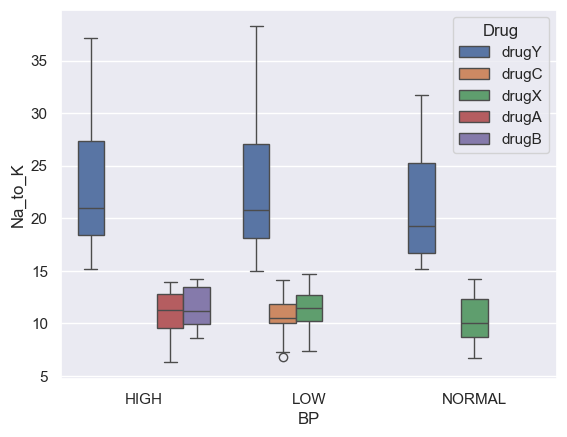

In [36]:
sns.boxplot(data=data,x='BP',y='Na_to_K', hue='Drug')

<Axes: xlabel='Cholesterol', ylabel='Na_to_K'>

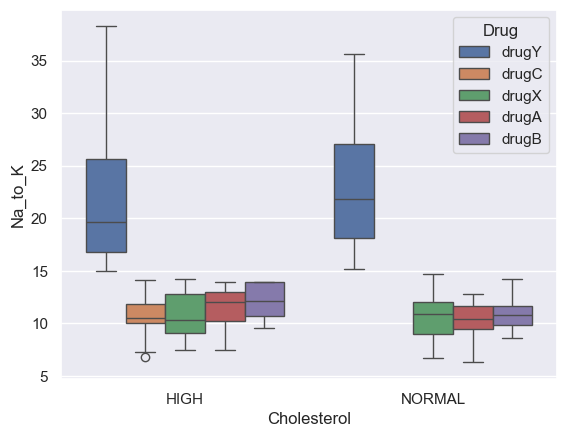

In [37]:
sns.boxplot(data=data,x='Cholesterol',y='Na_to_K', hue='Drug')

In [38]:
data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

<div id='2.3' style='background-color:#80ced6;text-align:center;padding:4px;border-radius:25px'>
    <h3 style='color:black;font-family:Impact'> Model Building </h3>
</div>

In [39]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [40]:
df=data.copy()

In [41]:
bin_age = [0, 19, 29, 39, 49, 59, 69, 80]
category_age = ['<20s', '20s', '30s', '40s', '50s', '60s', '>60s']
df['Age_binned'] = pd.cut(df['Age'], bins=bin_age, labels=category_age)
df = df.drop(['Age'], axis = 1)

In [42]:
bin_NatoK = [0, 9, 19, 29, 50]
category_NatoK = ['<10', '10-20', '20-30', '>30']
df['Na_to_K_binned'] = pd.cut(df['Na_to_K'], bins=bin_NatoK, labels=category_NatoK)
df = df.drop(['Na_to_K'], axis = 1)

In [43]:
df

,Sex,BP,Cholesterol,Drug,Age_binned,Na_to_K_binned
0,F,HIGH,HIGH,drugY,20s,20-30
1,M,LOW,HIGH,drugC,40s,10-20
2,M,LOW,HIGH,drugC,40s,10-20
3,F,NORMAL,HIGH,drugX,20s,<10
4,F,LOW,HIGH,drugY,60s,10-20
...,...,...,...,...,...,...
195,F,LOW,HIGH,drugC,50s,10-20
196,M,LOW,HIGH,drugC,<20s,10-20
197,M,NORMAL,HIGH,drugX,50s,10-20
198,M,NORMAL,NORMAL,drugX,20s,10-20


In [44]:
x=df.drop(["Drug"], axis=1)
x

,Sex,BP,Cholesterol,Age_binned,Na_to_K_binned
0,F,HIGH,HIGH,20s,20-30
1,M,LOW,HIGH,40s,10-20
2,M,LOW,HIGH,40s,10-20
3,F,NORMAL,HIGH,20s,<10
4,F,LOW,HIGH,60s,10-20
...,...,...,...,...,...
195,F,LOW,HIGH,50s,10-20
196,M,LOW,HIGH,<20s,10-20
197,M,NORMAL,HIGH,50s,10-20
198,M,NORMAL,NORMAL,20s,10-20


In [45]:
y=df['Drug']
y

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

<div id='2.3' style='background-color:;text-align:centre;padding:5px;border-radius:35px'>
    <h2 style='color:#003f5c;font-family:Impact'> Train_Test_Split </h2>
</div>

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [47]:
x_train

,Sex,BP,Cholesterol,Age_binned,Na_to_K_binned
131,M,LOW,NORMAL,50s,>30
96,F,LOW,HIGH,50s,>30
181,F,NORMAL,HIGH,50s,10-20
19,F,HIGH,NORMAL,30s,20-30
153,F,LOW,NORMAL,>60s,10-20
...,...,...,...,...,...
67,M,NORMAL,NORMAL,<20s,10-20
192,M,LOW,HIGH,>60s,10-20
117,F,NORMAL,HIGH,40s,10-20
47,M,LOW,HIGH,60s,10-20


In [48]:
x_test

,Sex,BP,Cholesterol,Age_binned,Na_to_K_binned
18,M,LOW,HIGH,20s,<10
170,F,NORMAL,HIGH,20s,10-20
107,M,LOW,HIGH,40s,20-30
98,M,HIGH,NORMAL,20s,>30
177,M,NORMAL,HIGH,20s,20-30
182,F,LOW,NORMAL,20s,10-20
5,F,NORMAL,HIGH,20s,<10
146,F,LOW,NORMAL,30s,10-20
12,M,LOW,HIGH,40s,10-20
152,M,NORMAL,NORMAL,50s,<10


<div id='2.3' style='background-color:;text-align:centre;padding:5px;border-radius:35px'>
    <h2 style='color:#003f5c;font-family:Impact'> One Hot Encoding </h2>
</div>

In [49]:
from sklearn.preprocessing import OneHotEncoder

In [50]:
encoder=OneHotEncoder()

In [51]:
x_train = pd.DataFrame(encoder.fit_transform(x_train).toarray())
x_test = pd.DataFrame(encoder.fit_transform(x_test).toarray())

In [52]:
y_train.to_frame().value_counts()

Drug 
drugY    61
drugX    36
drugA    18
drugB    13
drugC    12
Name: count, dtype: int64

In [53]:
y_train

131    drugY
96     drugY
181    drugX
19     drugY
153    drugX
       ...  
67     drugX
192    drugY
117    drugX
47     drugC
172    drugY
Name: Drug, Length: 140, dtype: object

In [54]:
y_test.to_frame().value_counts()

Drug 
drugY    30
drugX    18
drugA     5
drugC     4
drugB     3
Name: count, dtype: int64

* Where target variables are imbalenced in test and train data so we need to balence.

<div id='2.3' style='background-color:;text-align:centre;padding:5px;border-radius:35px'>
    <h2 style='color:#003f5c;font-family:Impact'> Balencing Data Using Oversampling SMOT </h2>
</div>

In [55]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

In [56]:
x_train_s, y_train_s = smote.fit_resample(x_train, y_train)

In [57]:
x_train_s

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.000000,1.000000,0.0,1.000000,0.000000,0.0,1.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.0
1,1.000000,0.000000,0.0,1.000000,0.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.0
2,1.000000,0.000000,0.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.0
3,1.000000,0.000000,1.0,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.0,0.000000,0.0
4,1.000000,0.000000,0.0,1.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.0,1.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,0.000000,1.000000,0.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.304614,0.000000,0.695386,0.0,1.000000,0.0,0.000000,0.0
301,0.097672,0.902328,0.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.0
302,0.000000,1.000000,0.0,0.684233,0.315767,0.0,1.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.684233,0.0,0.315767,0.0
303,1.000000,0.000000,0.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.440152,0.559848,0.000000,0.0,1.000000,0.0,0.000000,0.0


In [58]:
y_train_s

0      drugY
1      drugY
2      drugX
3      drugY
4      drugX
       ...  
300    drugX
301    drugX
302    drugX
303    drugX
304    drugX
Name: Drug, Length: 305, dtype: object

[]

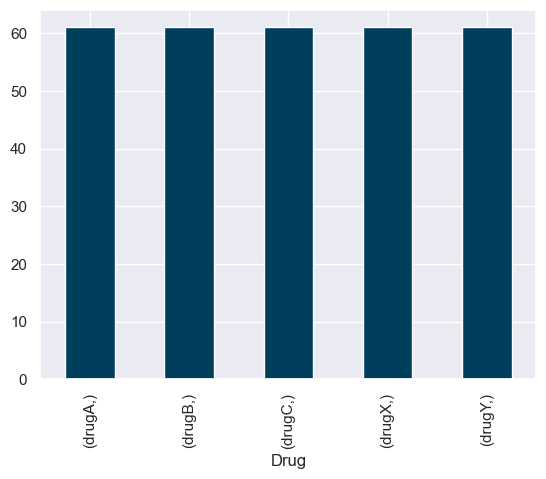

In [59]:
y_train_s.to_frame().value_counts().plot(kind='bar',color=['#003f5c'])
plt.plot()

* Here we can see the distribution of 'drug' feature is balenced.

In [60]:
x_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
136,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
137,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
138,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [61]:
x_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<div id='2.3' style='background-color:;text-align:centre;padding:5px;border-radius:35px'>
    <h1 style='color:#002a4c;font-family:Impact'>MODELS</h1>
</div>

<div id='2.3' style='background-color:;text-align:centre;padding:5px;border-radius:35px'>
    <h2 style='color:#003f5c;font-family:Impact'>KNeighbors Classifier </h2>
</div>

In [71]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=10)
kn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [72]:
y_pred_kn=kn.predict(x_test)
y_pred_kn

array(['drugY', 'drugX', 'drugY', 'drugY', 'drugY', 'drugX', 'drugX',
       'drugX', 'drugC', 'drugX', 'drugY', 'drugY', 'drugY', 'drugX',
       'drugB', 'drugC', 'drugY', 'drugX', 'drugX', 'drugA', 'drugA',
       'drugX', 'drugX', 'drugX', 'drugX', 'drugX', 'drugX', 'drugY',
       'drugY', 'drugX', 'drugX', 'drugC', 'drugA', 'drugX', 'drugY',
       'drugY', 'drugX', 'drugC', 'drugA', 'drugY', 'drugY', 'drugA',
       'drugA', 'drugX', 'drugY', 'drugX', 'drugX', 'drugY', 'drugA',
       'drugB', 'drugY', 'drugB', 'drugY', 'drugY', 'drugY', 'drugC',
       'drugX', 'drugX', 'drugX', 'drugB'], dtype=object)

In [73]:
accuracy_kn=accuracy_score(y_test,y_pred_kn)
accuracy_kn

0.7

In [74]:
report = classification_report(y_test, y_pred_kn)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

       drugA       0.57      0.80      0.67         5
       drugB       0.75      1.00      0.86         3
       drugC       0.40      0.50      0.44         4
       drugX       0.71      0.94      0.81        18
       drugY       0.80      0.53      0.64        30

    accuracy                           0.70        60
   macro avg       0.65      0.76      0.68        60
weighted avg       0.72      0.70      0.69        60

